## What is Matplotlib?

> matplotlib is a library for making 2D plots of arrays in Python
>
> *-matplotlib.org/users/intro.html*

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import pandas as pd

In [2]:
matplotlib.__version__

'3.0.2'

In [3]:
%%time
bit = pd.read_csv('../data/coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')
bit['date'] = pd.to_datetime(bit.Timestamp, unit='s')

CPU times: user 1.96 s, sys: 296 ms, total: 2.26 s
Wall time: 2.26 s


In [4]:
daily = (bit
    .set_index('date')
    .resample('d')
    .agg({'Close': 'last', 'Open': 'first', 'High': 'max', 'Low': 'min'}))

x = daily.index
y = daily.Close

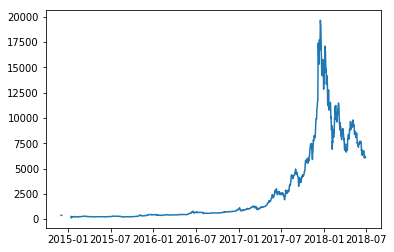

In [5]:
plt.plot(x,y)

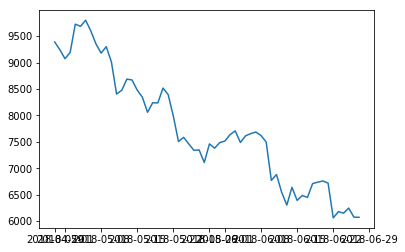

In [6]:
# last 60 days
days = 60
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
plt.plot(x_days, y_days)

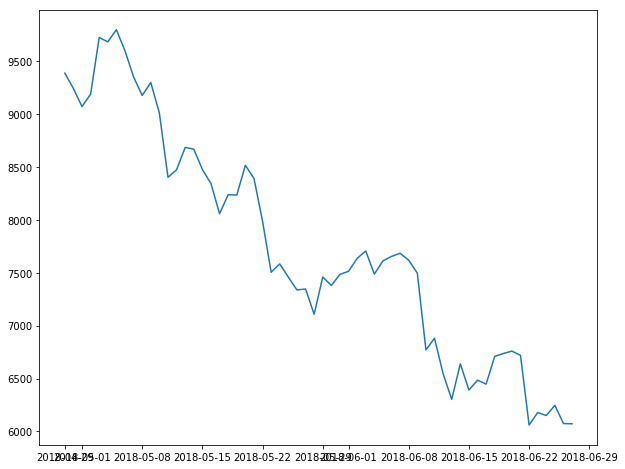

In [7]:
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
ax.plot(x_days, y_days)

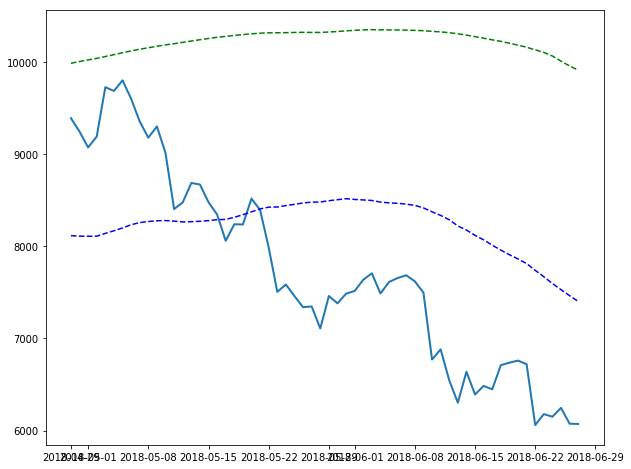

In [8]:
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2)
ax.plot(x_days, y_days_ma50, color='b', linestyle='--')
ax.plot(x_days, y_days_ma200, color='g', linestyle='--')


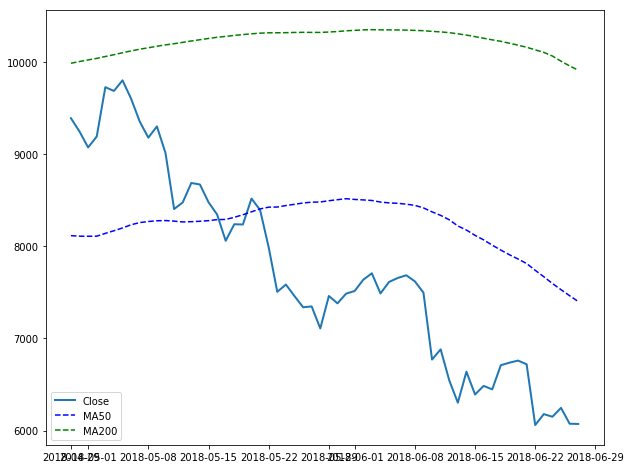

In [9]:
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()


Text(736819.0, 9800.0, 'Max 9800.0')

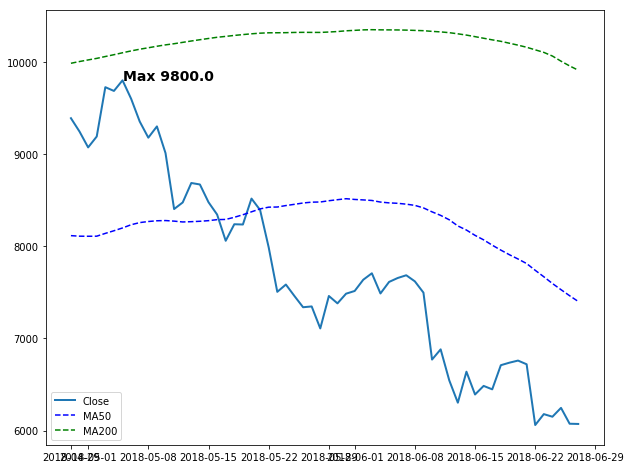

In [10]:
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)


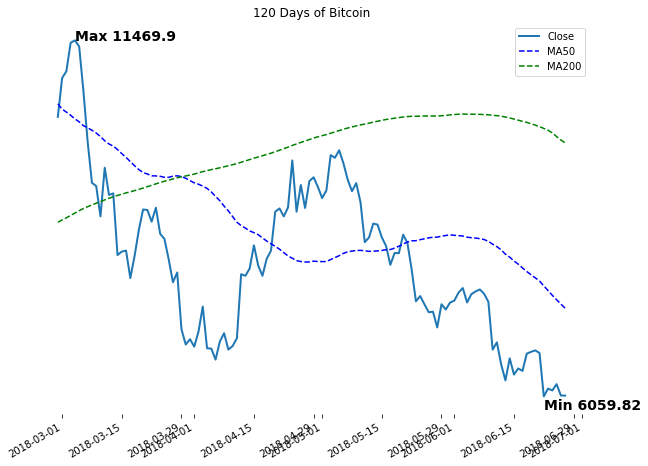

In [11]:
# Add title
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 120
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)

min_val = min(y_days)
min_idx = y_days.idxmin()
ax.annotate(f'Min {min_val}', xy=(mdt.date2num(min_idx), min_val - 200),
           weight='bold', size=14)

#plt.axis('off')  # everything
ax.get_yaxis().set_visible(False)
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_title(f'{days} Days of Bitcoin')
fig.autofmt_xdate()


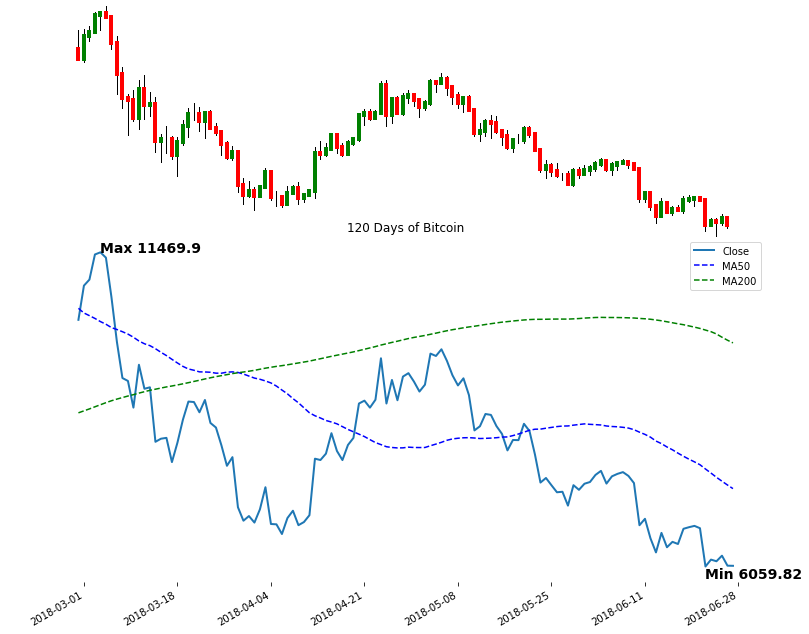

In [12]:
# Add candlesticks
# Add title
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
# 
fig = plt.figure(figsize=(10,8))
# [left, bottom, width, height] quantities.

ax = fig.add_axes((0,0,1,.6))
days = 120
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)

min_val = min(y_days)
min_idx = y_days.idxmin()
ax.annotate(f'Min {min_val}', xy=(mdt.date2num(min_idx), min_val - 200),
           weight='bold', size=14)

#plt.axis('off')  # everything
ax.get_yaxis().set_visible(False)
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_title(f'{days} Days of Bitcoin')
xticks = ax.get_xticks()
ax.set_xticks(range(int(xticks[0]), int(xticks[-1]), 
                    int((xticks[-1]-xticks[0])/7)))
fig.autofmt_xdate()

cdata = daily.iloc[-days:]
ax2 = fig.add_axes((0,.6,1,.4))
ax2.plot([cdata.index[0],cdata.index[0]], [3,4])
min2 = None
max2 = None
for idx, row in cdata.iterrows():
    ax2.plot([idx, idx],[row.High, row.Low], c='k', linewidth=1)
    open_ = row.Open
    close = row.Close
    if open_ < close:
        color = 'g'
        lo = open_
        hi = close
    else:
        color = 'r'
        lo = close
        hi = open_
    if min2 is None or min2 > row.Low:
        min2 = row.Low
    if max2 is None or max2 < row.High:
        max2 = row.High
    ax2.plot([idx, idx],[lo, hi], c=color, linewidth=4)
ax2.set_ylim([min2, max2])
_ = ax2.axis('off')

In [13]:
# save
fig.savefig('/tmp/plot.png', dpi=300)

In [14]:
# Non-Jupyter - render plot
plt.show()

## Interfaces

Matplotlib has an object-oriented interface to create *figures*, add *axes*, and plot on the *axes*. In addition there is a *state machine* interface found in the ``pyplot`` package. This interface mimics MATLAB.

OO Interface:

* **Figure** - The canvas. You can add axes to it.
* **Axes** - This is a plot. It can have a title, an x label, and a y label. A 2D plot has 2 axis. A 3D plot has 3.
* **Axis** - (Note spelling) - These hold ticks, ticklabels, and define limits. You can customize a *Locator* and *Formatter* to adjust the position and labels.
* **Artist** - (Confusing term) for describing what you can draw on a plot.
* **Backend** - This is the rendering engine for creating a plot (pdf, png, svg, etc) as well as an interface (pygtk, wx, macos, inline). For Jupyter, we specify the cell magic ``%matplotlib inline``

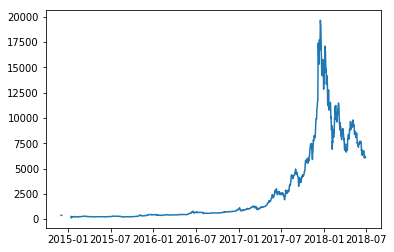

In [15]:
# OO Example
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from IPython.core.display import display

fig = Figure()
FigureCanvas(fig)  # Figure needs a canvas (pyplot does this for us)
ax = fig.add_subplot(111)
ax.plot(x, y)
display(fig)

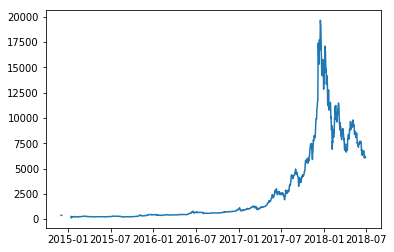

In [16]:
# pyplot example
import matplotlib.pyplot as plt
plt.plot(x,y)

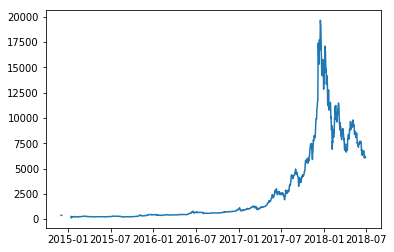

In [17]:
# In practice I create figures or axes w/ pyplot
ax = plt.subplot(111)
# fig, ax = plt.subplots()  # to get figure as well
ax.plot(x, y)

The ``plt`` interface has a few functions (``figure``, ``legend``, ``title``, ``xlabel``, ``xlim``, ``xscale``, ``xticks``, ``ylabel``, ``ylim``, ``yscale``, ``yticks``), that have corresponding accessors on ``ax``. Ie ``ax.get_xticks()``. In addition you can use ``ax.set(title='foo', xlabel='bar', xlim=(1,100))`` to set multiple attributes.

## Lab Data
This section will load the lab data. We will be using a portion of the https://www.fueleconomy.gov/feg/download.shtml dataset. We will have a few data variables:

* ``v_df`` - Raw Fuel Econonmy data
* ``f150_df`` - All data for Ford F150's
* ``highway`` - Average highway mileage for F150's by year


In [18]:
import pandas as pd
v_df = pd.read_csv('../data/vehicles.csv.zip')
v_df[v_df.make=='Ford'].model.value_counts()
f150_df = v_df[(v_df.make=='Ford') & (v_df.model.str.contains('F150'))]
highway = f150_df.groupby('year').UHighway.mean()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
f150_df.T

,308,309,310,311,312,314,315,316,409,410,...,38299,38300,38400,38401,38403,38404,38405,38406,38407,38408
barrels08,21.974,21.974,21.974,21.974,21.974,23.5436,21.974,25.3546,23.5436,21.974,...,23.5436,27.4675,23.5436,23.5436,23.5436,23.5436,25.3546,25.3546,25.3546,27.4675
barrelsA08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charge120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charge240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
city08,14,15,14,13,13,14,14,11,13,14,...,12,11,12,14,13,12,11,12,12,11
city08U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cityA08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cityA08U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cityCD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cityE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
highway

year
1984    20.323529
1985    21.354703
1986    22.686276
1987    20.928200
1988    21.375685
1989    20.915956
1990    21.622505
1991    22.394231
1992    21.876606
1993    22.796481
1994    23.170164
1995    23.146158
1996    22.543590
1997    25.000000
1998    23.773200
1999    23.102809
2000    24.228827
2001    17.802994
2002    17.795744
2003    20.393419
2004    19.747993
2005    24.112783
2006    24.012800
2007    24.536510
2008    24.900390
2009    26.450143
2010    26.569767
2011    27.654167
2012    27.836707
2013    27.870740
2014    27.969087
2015    32.183375
2016    31.865407
2017    32.139605
2018    33.312819
Name: UHighway, dtype: float64

## Exercise: Interface
Using the ``highway`` data:
* Plot the average mph against year using the OO style interface (you can get access to the year data by using ``highway.index``)
* Plot the average mph against year using the ``plt`` interface
* Bump the figure size up to 10 inches wide by 8 inches tall in both plots

<BarContainer object of 35 artists>

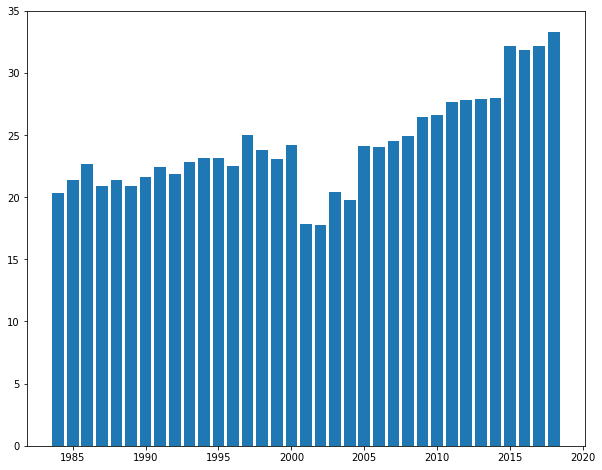

In [21]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(highway.index, highway)

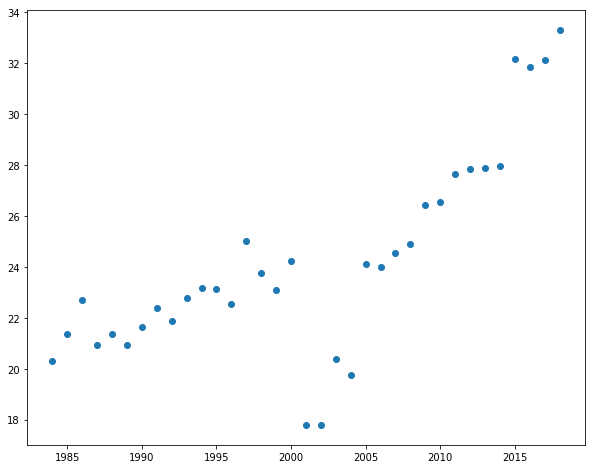

In [22]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(highway.index, highway)

(array([2., 3., 7., 7., 6., 2., 4., 0., 0., 4.]),
 array([17.79574375, 19.34745123, 20.8991587 , 22.45086618, 24.00257366,
        25.55428113, 27.10598861, 28.65769609, 30.20940356, 31.76111104,
        33.31281852]),
 <a list of 10 Patch objects>)

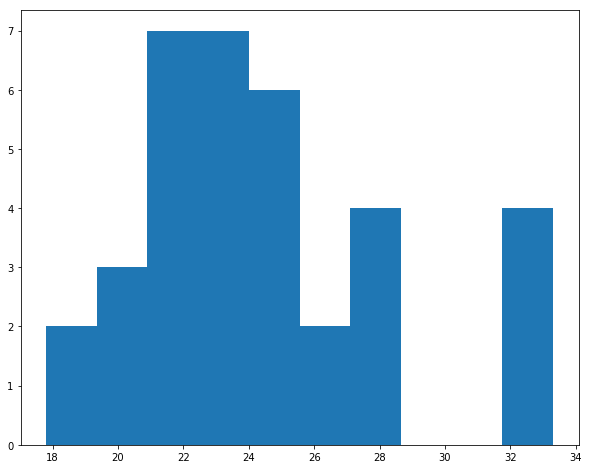

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.hist(highway)

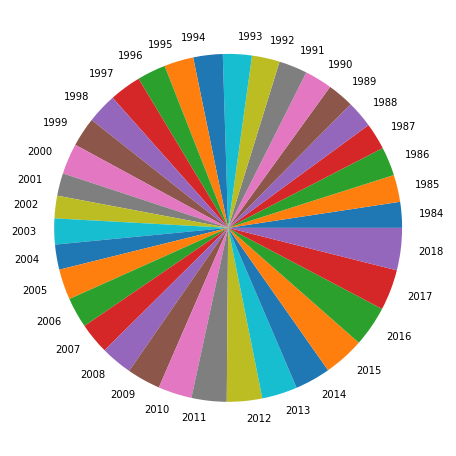

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))
_ = ax.pie(highway, labels=highway.index) ## deletes unnecessary variables

## Basic Plots
Matplotlib supports a variety of plots out of the box.

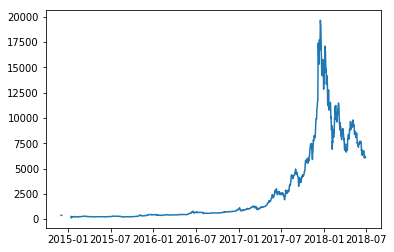

In [ ]:
# Line Plot
fig, ax = plt.subplots()
ax.plot(x, y)

In [ ]:
# Bar Plot
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x, y)

<BarContainer object of 1305 artists>

In [ ]:
# Scatter Plot - Using .scatter can be slower than plot. Use .scatter when you want to 
# tweak attribute
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y, marker='o', alpha=.5)

In [ ]:
# Scatter Plot - test
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, marker='o', alpha=.5, color='pink', markeredgecolor='red',
        markerfacecolor='black', markeredgewidth=3)
#ax.plot(x, y, 'o', alpha=.5)

In [ ]:
# Scatter Plot - Using .scatter can be slower than plot. Use .scatter when you want to 
# tweak attribute
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y, marker='o', alpha=.5)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(f150_df.year, f150_df.UHighway, c=f150_df.city08,
           s=f150_df.cylinders**2.4, marker='o', alpha=.5,
           cmap='viridis')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(f150_df.city08, f150_df.UHighway, c=f150_df.city08,
           s=f150_df.cylinders**2.4, marker='o', alpha=.5,
           cmap='viridis')

In [ ]:
print([list(g.city08) for name, g in f150_df.groupby('year')])

In [ ]:
# boxplot
fig, ax = plt.subplots(figsize=(10,8))
data = [(name, list(g.city08)) for name, g in f150_df.groupby('year')]
year_mileage = [x[1] for x in data]
years = [x[0] for x in data]
_ = ax.boxplot([list(g.city08) for name, g in f150_df.groupby('year')],
              labels=years, vert=False)
plt.tight_layout()

In [ ]:
# violin plot
fig, ax = plt.subplots(figsize=(10,8))
data = [(name, list(g.city08)) for name, g in f150_df.groupby('year')]
year_mileage = [x[1] for x in data]
years = [x[0] for x in data]
size = 10
ax.violinplot([list(g.city08) for name, g in f150_df.groupby('year')][:size])
# No labels parameter for violinplot...
ax.set_xticks(range(1, size + 1))  # tell labels to start at 1 instead of 0
_ = ax.set_xticklabels(years[:size])


In [ ]:
# Histogram - careful of values that you feed it
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(y.values)

In [ ]:
y  # Note NaN!

In [ ]:
# Histogram
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.hist(y.dropna())

In [ ]:
# Histogram
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.hist(y.dropna(), bins=100)

In [ ]:
pd.concat([y, y.shift(-1), y - y.shift(-1)], axis=1)

In [ ]:
# Histogram
fig, ax = plt.subplots(figsize=(10,8))
_ = ax.hist((y - y.shift(-1)).dropna())

In [ ]:
# Pie
fig, ax = plt.subplots(figsize=(10,8))
_=ax.pie([10, 5], labels=['10', '5'])
ax.legend()

## Exercise: Plot Types

*  Plot a line plot of the ``highway`` data
*  Plot a bar plot of the ``highway`` data
* Plot a scatter plot of the ``highway`` data
* Plot a histogram of the ``highway`` data
* Plot a pie chart of the ``highway`` data

## Architecture

In [ ]:
# Notice what ax.plot returns
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

In [ ]:
print(dir(res[0]))

In [ ]:
help(res[0])

In [ ]:
# Change color and line style
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')

In [ ]:
# Set the title
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Bitcoin Pricing')

In [ ]:
title

In [ ]:
# Tweak title position
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Bitcoin Pricing')
title.set_position((.2,.7))
ax.tick_params(bottom=False, left=False)

In [ ]:
# let's look at the ax
print(dir(ax))

In [ ]:
yax = ax.get_yaxis()

In [ ]:
for member in dir(yax):
    if member.startswith('get'):
        try:
            print(f'{member:20}: {getattr(yax, member)()}')
        except TypeError:
            print(f'**ERR with {member}')
yax.get_scale()

In [ ]:
# Customize tick locations
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Bitcoin Pricing')
title.set_position((.2,.7))

yax = ax.get_yaxis()
yax.set_ticks([-50, 500, 2000, 5000, 40000])

In [ ]:
# Remove spines
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Bitcoin Pricing')
title.set_position((.2,.7))

yax = ax.get_yaxis()
yax.set_ticks([-50, 500, 2000, 5000, 40000])

import matplotlib
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)

In [ ]:
# Remove ticks
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
line = res[0]  # Once we have line we can use tab completion
line.set_c('#c07fef')
line.set_linestyle('--')
title = ax.set_title('Bitcoin Pricing')
title.set_position((.2,.7))

yax = ax.get_yaxis()
yax.set_ticks([-50, 500, 2000, 5000, 40000])


import matplotlib
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)
        
ax.tick_params(bottom=False, left=False)#, labelleft='on')        

In [ ]:
# Jupyter hint
ax.tick_params??

## Exercise: Architecture

Using the ``highway`` data set, create a line plot, then
* Set the yticks to ``[10, 20, 30, 40]``
* Add a title in the middle of the plot ``F150 Avg. Mileage``
* Remove top and right spine

In [ ]:
fig, ax = plt.subplots()
ax.plot(highway)
yax = ax.get_yaxis()
yax.set_ticks([10, 20, 30, 40])
title = ax.set_title('F150 Avg. Mileage')
title.set_position((.5, .5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Annotating Charts

In [ ]:
ax.text??

In [ ]:
# Add text to chart in data coordinates
# Note Jupyter version might fail without ``clip_on=True``)
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
ax.text(ax.get_xlim()[0], 2100, 'Bitcoin', clip_on=True)

In [ ]:
# Tweak text properties
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
# Need TTF/OTF fonts (TTC currently fail)
ax.text(ax.get_xlim()[0], 2100, 'Bitcoin', clip_on=True,
       family='Comic Sans MS', size=20)
# bbox is a mpl.patches.Rectangle
_ = ax.text(ax.get_xlim()[0], 5700, 'Bitcoin', clip_on=True,
       family='Serif', size=20, style='italic', bbox={'facecolor': 'red', 'alpha': .5})

In [ ]:
# Add text to chart USING 0-1 coordinates
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)
# Need TTF/OTF fonts (TTC currently fail)
ax.text(0, .2, 'Bitcoin', clip_on=True,
       family='Comic Sans MS', size=20, 
       transform=ax.transAxes)
# bbox is a mpl.patches.Rectangle
ax.text(0, .5, 'Bitcoin', clip_on=True,
       family='Serif', size=20, style='italic', 
       bbox={'facecolor': 'red', 'alpha': .5},
       transform=ax.transAxes)

In [ ]:
x

In [ ]:
# Add text to chart in data coordinates
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

ax.annotate(f'Min {y.min()}', xy=(x.min(), y.min()), 
            xytext=(x.min(), y.min() + 300))

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate(f'Max {y.max()}', xy=(y.idxmax(), y.max()), 
                xytext=(y.idxmax()-500, y.max() + 300),
                family='comic sans ms',
                arrowprops={})


In [ ]:
# Add text to chart USING 0-1 coordinates
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

ax.annotate(f'Min {y.min()}', xy=(0, 0), 
            xytext=(0, .1),
            xycoords='axes fraction', 
            textcoords='axes fraction')

# arrowprops is a mpl.patches.FancyArrowPatch
_ = ax.annotate(f'Max {y.max()}', xy=(y.idxmax(), y.max()), 
                xytext=(.5, .8),
                textcoords='axes fraction',
                family='comic sans ms',
                arrowprops={})


## Exercise: Annotation
Using the ``highway`` dataset. Plot a bar plot. Remove the y axis. Label each bar with its value right above (or inside of the top of) the bar. (See https://matplotlib.org/users/text_props.html page for help with rotation or vertical or horizontal alignment)

In [ ]:
fig.ax = plt.subplots(figsize=(10, 6))
res = ax.bar(highway.index, highway)
for pos, value in highway.iteritems():
    ax.text(pos, value, f'{value:.0f}', rotation = '90', ha='center')
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)
ax.tick_params(bottom=False left=False)

## Configuring Matplotlib

In [ ]:
plt.style.use(plt.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

In [ ]:
# Default style is stored here
print(plt.rcParamsDefault)

In [ ]:
print(plt.style.available)

In [ ]:
# note that changing the style leaves it changed
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

In [ ]:
# use a context manager for temporary changes
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10,8))
    res = ax.plot(x, y)

In [ ]:
# go back to defaults
matplotlib.rcdefaults()

fig, ax = plt.subplots(figsize=(10,8))
res = ax.plot(x, y)

In [ ]:
# can create a configuration file in $MPLCONFIGDIR environment variable
# MPLCONFIGDIR/
#      matplotlibrc - default styles
#      stylelib/CUSTOM.mlpstyle - can use matplotlib.style.use('CUSTOM') 
#             (Might need to plt.style.reload_library() )
matplotlib.get_configdir()

In [ ]:
# style loading done at import time. need to reload
import importlib, os
folder = os.path.join(matplotlib.get_configdir(), 'stylelib')
if not os.path.exists(folder):
    os.mkdir(folder)
cfg_name = os.path.join(folder, 'big.mplstyle')
with open(cfg_name, 'w') as fout:
    fout.write("""
axes.labelsize : 36
lines.linewidth : 4
xtick.labelsize : 24
ytick.labelsize : 32
    """)
print(cfg_name)
plt.style.reload_library()
with plt.style.context('big'):
    fig, ax = plt.subplots(figsize=(10,8))
    # these fail in Jupyter currently (Sep 2018 - https://github.com/jupyter/notebook/issues/3385)
    matplotlib.rcParams['grid.color'] = 'r'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rc('grid', color='r', alpha=1, linestyle='-', linewidth=1)
    res = ax.plot(x, y)

In [ ]:
# linestyle - see help for ax.plot
fig, ax = plt.subplots(figsize=(10,8))

for i, (name, shortcut) in enumerate([('solid', '-',), ('dashed', '--'), 
    ('dashdot', '-.'), ('dotted', ':')]):
    ax.plot(y+i*2400, linestyle=shortcut, label=name, linewidth=3)
ax.legend()

In [ ]:
# Adjust axis limits
fig, ax = plt.subplots()
ax.set_ylim((0, 30000))
ax.plot(y, linestyle=shortcut, label=name, linewidth=3)


In [ ]:
# Adjust Labels
# Can also set with ax.axis, which can also set x/y scale to same value with 'equal'.
fig, ax = plt.subplots()
ax.plot(y, linestyle=shortcut, label=name, linewidth=3)
ax.set_title('Bitcoin Close Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Dollars')
# ax.set(title='Bitcoin Close Prices', xlabel='Date', ylabel='Dollars')

In [ ]:
# colormaps (useful on scatter plots)
fig, ax = plt.subplots()
ax.set_ylim((0, 30000))
ax.scatter(x, y, alpha=.3, c=y, cmap='PiYG')

In [ ]:
# see https://matplotlib.org/examples/color/colormaps_reference.html
import numpy as np
colormaps = [x for x in plt.cm.datad.keys() if not x.endswith('_r')]

fig, axes = plt.subplots(nrows=len(colormaps), figsize=(10,18))
plt.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
for i, m in enumerate(sorted(colormaps)):
    ax = axes[i]
    ax.set_axis_off()
    ax.imshow(gradient,aspect='auto',
               cmap=m)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, m, va='center', ha='right', fontsize=10)


In [ ]:
# Line Plot - Colors (can specify with HEX)
fig, ax = plt.subplots()
ax.plot(x, color='#C07FEF', linewidth=3, linestyle='--')

In [ ]:
# Bar Plot color - pass in a single color or parallel sequence
last10 = y.iloc[-10:]
fig, ax = plt.subplots()
colors = ['red' for val in last10]
colors[0] = '#c07fef'
colors[-1] = '#fef70c'
ax.bar(last10.index, last10, color=colors)
fig.autofmt_xdate()  # tweak dates


## Exercise: Customize

* Create a line plot of ``highway`` temporarily using the ``'dark_background'`` style, dotted lines, and a linewidth of 5
* Using the bar plot from the annotation exercise, color all the bars grey, except color the minimum value red and the maximum value green.

## Interactive Matplotlib

In [ ]:
# might have to call twice :( 
%matplotlib notebook
%matplotlib notebook

In [ ]:
# Line Plot - Colors (can specify with HEX)
fig, ax = plt.subplots()
ax.plot(x, y, color='#C07FEF', linewidth=3, linestyle='--')

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
colors = ['#999999' for val in highway]
years = highway.index
colors[years.get_loc(highway.idxmin())] = 'r'
colors[years.get_loc(highway.idxmax())] = 'g'

res = ax.bar(highway.index, highway, color=colors)
for pos, value in highway.iteritems():
    ax.text(pos, value-1, f'{value:.0f}', 
            rotation='90',
            ha='center',
            color='w')
    
for c in ax.get_children():
    if isinstance(c, matplotlib.spines.Spine):
        c.set_visible(False)
        
ax.tick_params(bottom=False, left=False, labelleft=False)#, labelleft='on')       
# tweak to clean up right tick
xticks = ax.get_xticks()
# tweak dates
#ax.xaxis.set_major_locator(plt.MaxNLocator(7))
_ = ax.set_xticks(range(1985, 2016, 5))



In [ ]:
# Using widgets - http://jupyter.org/widgets
import ipywidgets as ipw
from IPython.display import display
%matplotlib notebook

In [ ]:
def update_plot(days):
    fig, ax = plt.subplots()
    #ax.set_ylim((0, 30000))
    ax.plot(y.iloc[-days:], linewidth=3)

days_w = ipw.IntSlider(value=20, min=5, max=120)
ipw.interactive(update_plot, days=days_w)

In [ ]:
from IPython.html import widgets
from IPython.display import display

geo={'USA':['CHI','NYC'],'Russia':['MOW','LED']}

def print_city(city):
    print(city)

def select_city(country):
    cityW.options = geo[country]


scW = widgets.Select(options=geo.keys())
init = scW.value
cityW = widgets.Select(options=geo[init])
j = widgets.interactive(print_city, city=cityW)
i = widgets.interactive(select_city, country=scW)
display(i)
display(j)

In [ ]:
def plot_mileage(make, model=None):
    if model:
        df = v_df[(v_df.make == make) & (v_df.model == model)]
    else:
        df = v_df[(v_df.make == make)]
    highway = df.groupby('year').UHighway.mean()
    fig, ax = plt.subplots(figsize=(10,6))
    colors = ['#999999' for val in highway]
    years = highway.index
    colors[years.get_loc(highway.idxmin())] = 'r'
    colors[years.get_loc(highway.idxmax())] = 'g'

    res = ax.bar(highway.index, highway, color=colors)
    for pos, value in highway.iteritems():
        ax.text(pos, value-1, f'{value:.0f}', 
                rotation='90',
                ha='center',
                color='w')

    for c in ax.get_children():
        if isinstance(c, matplotlib.spines.Spine):
            c.set_visible(False)

    ax.tick_params(bottom=False, left=False, labelleft=False)#, labelleft='on')       
    # tweak to clean up right tick
    xticks = ax.get_xticks()
    # tweak dates
    #ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    _ = ax.set_xticks(range(1985, 2016, 5))
    ax.set_title(f'{make} {model}')

def plot_model(model):
    print(model)
    plot_mileage(make_w.value, model_w.value)

def select_make(make):
    print("MAKE", make)
    model_w.options = sorted(v_df[v_df.make==make].model.unique())


make_w = ipw.Select(options=sorted(v_df.make.unique()))
init = make_w.value
model_w = ipw.Select(options=sorted(v_df[v_df.make==init].model.unique()))
w2 = ipw.interactive(plot_model, model=model_w)
w1 = ipw.interactive(select_make, make=make_w)
display(w1)
display(w2)

## Exercise: Interactive
* Using the ``highway`` dataset, plot the mileage for F150 in an interactive plot
* Create a new dataframe ``f150_mean`` using the following code:

      f150_mean = f150_df.groupby('year').mean()
      
  Using an ipython select widget, make a field dropdown with the column names in it. When the column is selected, plot a line plot for that field.

## 3D and other Tools

In [ ]:
prius = (
    v_df[(v_df.make == "Toyota") & (v_df.model == "Prius")]
        .groupby('year')
        .mean()
)

In [ ]:
prius.T

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=prius.city08, ys=prius.highway08, zs=prius.index)

In [ ]:
%matplotlib inline
# Personally try to avoid 3D (though interactivity helps)
# Alternative is to plot scatterplots of pairs of variables
# Annoying in Matplotlib ... but

import seaborn as sns
res = sns.pairplot(data=prius.reset_index()[['year', 'city08', 'highway08']])
#res.axes[0][0].plot(range(10))

In [ ]:
# notices the ``axes`` and ``fig``
print(dir(res))

In [ ]:
%matplotlib inline
%matplotlib inline

# pandas
ax = y.plot()
ax.set_title('Pandas plot of Bitcoin')

In [ ]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.bar()
ax.set_title('Pandas plot of Bitcoin')

In [ ]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.bar()
ax.set_title('Pandas plot of Bitcoin')
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.autofmt_xdate()


In [ ]:
%matplotlib inline

# pandas
ax = y.iloc[-20:].plot.barh()
ax.set_title('Pandas plot of Bitcoin')

In [ ]:
prius

In [ ]:
prius.reset_index()['year']

In [ ]:
# note Matplotlib as of 1.5 has some support for pandas DataFrames
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x='year', y='city08', data=prius.reset_index())  # Fails!!!
ax.plot('year', 'city08', data=prius.reset_index())

## Other options for Plotting
* Bokeh - Aimed at HTML plots (interactive)
* Plotly - Service for plotting
* Altair - Declarative visualization

## Exercise: 3D and Pandas
* Plot a 3D scatter plot with the ``prius`` dataset, plotting 'co2TailpipeGpm', 'city08', and 'year'
* Use pandas with the ``highway`` dataset. Plot a bar plot. Remove the y axis. Label each bar with its value right above (or inside of the top of) the bar. (See https://matplotlib.org/users/text_props.html page for help with rotation or vertical or horizontal alignment). Color all the bars grey, except color the minimum value red and the maximum value green.
